In [118]:
import sklearn
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snsb
import warnings
warnings.filterwarnings('ignore')

In [119]:
df=pd.read_csv('YourCabs_training.csv')
df.head(5)

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0


In [120]:
df.loc[1:100,'travel_type_id']

1      2
2      2
3      2
4      2
5      2
      ..
96     2
97     2
98     2
99     2
100    2
Name: travel_type_id, Length: 100, dtype: int64

In [121]:
df=df[df['travel_type_id']==2]

In [122]:
df=df.drop(['travel_type_id','to_city_id','id','user_id'],1)
df['vehicle_model_id'].value_counts()
df=df.drop(['vehicle_model_id','package_id','from_city_id','to_date'],1)

In [123]:
a=df.groupby('from_area_id')['Car_Cancellation'].sum()
b=df.groupby('from_area_id')['Car_Cancellation'].count()
df['from_area_cancellation percentage']=round((a/b)*100,2)

In [124]:
df.replace(np.nan,0,inplace=True)
df.drop('from_area_id',1,inplace=True)
df.head(5)

,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,from_area_cancellation percentage
0,448.0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,0.0
1,540.0,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,0.0
2,1034.0,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,16.0
3,398.0,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,0.0
4,849.0,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,0.0


In [125]:
temp=df[df['from_area_cancellation percentage']!=0]['from_area_cancellation percentage']
temp.describe()

count    321.000000
mean      14.004984
std       12.817748
min        0.370000
25%        6.250000
50%       10.000000
75%       16.670000
max      100.000000
Name: from_area_cancellation percentage, dtype: float64

In [126]:
pd.qcut(temp,3)

2       (13.607, 100.0]
22       (7.69, 13.607]
25        (0.369, 7.69]
49      (13.607, 100.0]
52        (0.369, 7.69]
             ...       
1388      (0.369, 7.69]
1390     (7.69, 13.607]
1395    (13.607, 100.0]
1398    (13.607, 100.0]
1399     (7.69, 13.607]
Name: from_area_cancellation percentage, Length: 321, dtype: category
Categories (3, interval[float64, right]): [(0.369, 7.69] < (7.69, 13.607] < (13.607, 100.0]]

In [127]:
cd=[(df['from_area_cancellation percentage'].between(0.0,0.369)),(df['from_area_cancellation percentage'].between(0.369, 7.69)),(df['from_area_cancellation percentage'].between(7.69, 13.607)),(df['from_area_cancellation percentage'].between(13.607, 100.0))]
labels=['No Cancellation','low','medium','high']
df['fac_percentage']=np.select(cd,labels)

In [128]:
df.drop('from_area_cancellation percentage',1,inplace=True)


In [129]:
a=df.groupby('to_area_id')['Car_Cancellation'].sum()
b=df.groupby('to_area_id')['Car_Cancellation'].count()
df['to_area_cancellation_percentage']=round((a/b)*100,2)

In [130]:
df.replace(np.nan,0,inplace=True)
df.drop('to_area_id',1,inplace=True)

In [131]:
temp=df[df['to_area_cancellation_percentage']!=0]['to_area_cancellation_percentage']
temp.describe()

count    319.000000
mean      17.311254
std       16.988588
min        0.750000
25%        7.200000
50%       11.110000
75%       20.000000
max      100.000000
Name: to_area_cancellation_percentage, dtype: float64

In [132]:
pd.qcut(temp,3)

15      (17.39, 100.0]
16      (17.39, 100.0]
22       (8.76, 17.39]
25       (8.76, 17.39]
51       (8.76, 17.39]
             ...      
1388     (0.749, 8.76]
1390    (17.39, 100.0]
1395    (17.39, 100.0]
1398     (8.76, 17.39]
1399     (0.749, 8.76]
Name: to_area_cancellation_percentage, Length: 319, dtype: category
Categories (3, interval[float64, right]): [(0.749, 8.76] < (8.76, 17.39] < (17.39, 100.0]]

In [133]:
cd=[(df['to_area_cancellation_percentage'].between(0.0,0.749)),(df['to_area_cancellation_percentage'].between(0.749, 8.76)),(df['to_area_cancellation_percentage'].between(8.76, 17.39)),(df['to_area_cancellation_percentage'].between(17.39, 100.0))]
labels=['No Cancellation','low','medium','high']
df['tac_percentage']=np.select(cd,labels)

In [134]:
df.drop('to_area_cancellation_percentage',1,inplace=True)
df

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,fac_percentage,tac_percentage
0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,No Cancellation,No Cancellation
1,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,No Cancellation,No Cancellation
2,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,high,No Cancellation
3,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,No Cancellation,No Cancellation
4,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,No Cancellation,No Cancellation
...,...,...,...,...,...,...,...,...,...,...,...
43425,11/25/2013 0:00,0,1,11/24/2013 14:24,12.976770,77.572700,13.015080,77.677960,0,No Cancellation,No Cancellation
43426,11/24/2013 18:00,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0,No Cancellation,No Cancellation
43427,11/26/2013 1:00,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0,No Cancellation,No Cancellation
43429,11/24/2013 16:00,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0,No Cancellation,No Cancellation


In [135]:
df['date_time']=pd.to_datetime(df['from_date'])
df['booking_start']=pd.to_datetime(df['booking_created'])


In [136]:
days=df['date_time'].dt.day_name()
df['Weekdays']=np.where((days=='Saturday')|(days=='Sunday'),'Weekend','Weekday')

In [137]:
df.head(5)

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,fac_percentage,tac_percentage,date_time,booking_start,Weekdays
0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,No Cancellation,No Cancellation,2013-01-01 02:00:00,2013-01-01 01:39:00,Weekday
1,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,No Cancellation,No Cancellation,2013-01-01 09:00:00,2013-01-01 02:25:00,Weekday
2,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,high,No Cancellation,2013-01-01 03:30:00,2013-01-01 03:08:00,Weekday
3,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,No Cancellation,No Cancellation,2013-01-01 05:45:00,2013-01-01 04:39:00,Weekday
4,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,No Cancellation,No Cancellation,2013-01-01 09:00:00,2013-01-01 07:53:00,Weekday


In [138]:
pd.qcut(df['date_time'],4)

0        (2013-01-01 01:59:59.999999999, 2013-04-23 03:...
1        (2013-01-01 01:59:59.999999999, 2013-04-23 03:...
2        (2013-01-01 01:59:59.999999999, 2013-04-23 03:...
3        (2013-01-01 01:59:59.999999999, 2013-04-23 03:...
4        (2013-01-01 01:59:59.999999999, 2013-04-23 03:...
                               ...                        
43425           (2013-09-10 14:15:00, 2014-02-08 05:45:00]
43426           (2013-09-10 14:15:00, 2014-02-08 05:45:00]
43427           (2013-09-10 14:15:00, 2014-02-08 05:45:00]
43429           (2013-09-10 14:15:00, 2014-02-08 05:45:00]
43430           (2013-09-10 14:15:00, 2014-02-08 05:45:00]
Name: date_time, Length: 34292, dtype: category
Categories (4, interval[datetime64[ns], right]): [(2013-01-01 01:59:59.999999999, 2013-04-23 03:... < (2013-04-23 03:33:45, 2013-07-10 11:52:30] < (2013-07-10 11:52:30, 2013-09-10 14:15:00] < (2013-09-10 14:15:00, 2014-02-08 05:45:00]]

In [139]:
df['months']=df['date_time'].dt.month_name()
df.head(5)

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,fac_percentage,tac_percentage,date_time,booking_start,Weekdays,months
0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,No Cancellation,No Cancellation,2013-01-01 02:00:00,2013-01-01 01:39:00,Weekday,January
1,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,No Cancellation,No Cancellation,2013-01-01 09:00:00,2013-01-01 02:25:00,Weekday,January
2,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,high,No Cancellation,2013-01-01 03:30:00,2013-01-01 03:08:00,Weekday,January
3,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,No Cancellation,No Cancellation,2013-01-01 05:45:00,2013-01-01 04:39:00,Weekday,January
4,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,No Cancellation,No Cancellation,2013-01-01 09:00:00,2013-01-01 07:53:00,Weekday,January


In [140]:
df.drop(['from_date','booking_created'],1,inplace=True)

In [141]:
df.reset_index(inplace=True)
df['time difference between booking and trip date']=df['booking_start']
for i in range(len(df)):
    df['time difference between booking and trip date'][i]=((df['date_time'][i]-df['booking_start'][i]).seconds)/60

In [142]:
df.drop(['date_time','booking_start'],1,inplace=True)

In [143]:
df.drop('index',1,inplace=True)
df.head(5)

,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,fac_percentage,tac_percentage,Weekdays,months,time difference between booking and trip date
0,0,0,12.924150,77.672290,12.927320,77.635750,0,No Cancellation,No Cancellation,Weekday,January,21.0
1,0,0,12.966910,77.749350,12.927680,77.626640,0,No Cancellation,No Cancellation,Weekday,January,395.0
2,0,0,12.937222,77.626915,13.047926,77.597766,0,high,No Cancellation,Weekday,January,22.0
3,0,0,12.989990,77.553320,12.971430,77.639140,0,No Cancellation,No Cancellation,Weekday,January,66.0
4,0,0,12.845653,77.677925,12.954340,77.600720,0,No Cancellation,No Cancellation,Weekday,January,67.0


In [144]:
df['Seasons']=df['months']
for i in range(len(df)):
    if df['months'][i]=='March' or df['months'][i]=='April' or df['months'][i]=='May':
        df['Seasons'][i]='Spring'
    elif df['months'][i]=='June' or df['months'][i]=='July' or df['months'][i]=='August':
        df['Seasons'][i]='Summer'  
    elif df['months'][i]=='September' or df['months'][i]=='October' or df['months'][i]=='November':
        df['Seasons'][i]='Fall'
    elif df['months'][i]=='December' or df['months'][i]=='January' or df['months'][i]=='February':
        df['Seasons'][i]='Winter'

In [145]:
df.drop('months',1,inplace=True)
df['Seasons'].value_counts()

Summer    11847
Fall       9868
Spring     7902
Winter     4675
Name: Seasons, dtype: int64

In [146]:
!pip install haversine
import haversine as hs

In [147]:
df['Distance']=df['from_lat']
for i in range(len(df)):
    df['Distance'][i]=hs.haversine((df['from_lat'][i],df['from_long'][i]),(df['to_lat'][i],df['to_long'][i]))

In [150]:
df.drop(['from_lat','from_long','to_lat','to_long'],1,inplace=True)
df.head(10)


,online_booking,mobile_site_booking,Car_Cancellation,fac_percentage,tac_percentage,Weekdays,time difference between booking and trip date,Seasons,Distance
0,0,0,0,No Cancellation,No Cancellation,Weekday,21.0,Winter,3.975770
1,0,0,0,No Cancellation,No Cancellation,Weekday,395.0,Winter,13.995053
2,0,0,0,high,No Cancellation,Weekday,22.0,Winter,12.708431
3,0,0,0,No Cancellation,No Cancellation,Weekday,66.0,Winter,9.525167
4,0,0,0,No Cancellation,No Cancellation,Weekday,67.0,Winter,14.699802
5,0,0,0,No Cancellation,No Cancellation,Weekday,869.0,Winter,21.115294
6,0,0,0,No Cancellation,No Cancellation,Weekday,81.0,Winter,13.331039
7,0,0,0,No Cancellation,No Cancellation,Weekday,71.0,Winter,11.473843
8,0,0,0,No Cancellation,No Cancellation,Weekday,65.0,Winter,14.996566
9,0,0,0,No Cancellation,No Cancellation,Weekday,166.0,Winter,6.010733


In [151]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [152]:
df['fac_percentage']= label_encoder.fit_transform(df['fac_percentage'])
df['tac_percentage']= label_encoder.fit_transform(df['tac_percentage'])
df['Weekdays']= label_encoder.fit_transform(df['Weekdays'])
df['Seasons']= label_encoder.fit_transform(df['Seasons'])

In [153]:
df.describe()

,online_booking,mobile_site_booking,Car_Cancellation,fac_percentage,tac_percentage,Weekdays,Seasons,Distance
count,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000
mean,0.363058,0.048087,0.080923,0.018517,0.018576,0.277995,1.330369,17.378988
std,0.480889,0.213953,0.272720,0.205722,0.207129,0.448017,1.034139,10.463741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.569061
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.675554
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,26.283393
max,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,3.000000,59.841924


In [154]:
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split

In [155]:
X=df.drop('Car_Cancellation',1)
y=df['Car_Cancellation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [156]:
#Linear Regression model
from sklearn import metrics
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
y_pred=(abs(y_pred//1))

print(metrics.classification_report(y_test,y_pred))
print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.86      9461
           1       0.01      0.02      0.01       827

    accuracy                           0.75     10288
   macro avg       0.46      0.42      0.43     10288
weighted avg       0.83      0.75      0.79     10288

Accuracy:  0.749708398133748


In [98]:
#Decision tree model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [99]:
model=DecisionTreeClassifier(random_state=0)
model.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(random_state=0)>

In [49]:
# Providing the different values of hyperparameters
param_dist = {'max_depth': [2, 3, 4, 5, 6],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

# Running gridsearchCV to check for all the different PnCs of these parameter values
cv_model = GridSearchCV(model, cv = 5,
                     param_grid=param_dist, 
                     n_jobs = 3)

#Fitting the train set , so that grid search is executed on this dataset
cv_model.fit(X_train,y_train)

#Printing the best parameters by using best_params
print('Best Parameters using grid search: \n', cv_model.best_params_)

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2'}


In [100]:
model.set_params(criterion = 'entropy',
                  max_features = 'log2', 
                  max_depth = 6)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='log2',
                       random_state=0)

In [139]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(metrics.classification_report(y_test,y_pred))
print('Accuracy: ', metrics.accuracy_score(y_test,y_pred))
pd.Series(y_pred).value_counts()

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      9461
           1       0.33      0.00      0.00       827

    accuracy                           0.92     10288
   macro avg       0.63      0.50      0.48     10288
weighted avg       0.87      0.92      0.88     10288

Accuracy:  0.9194206842923794


0    10282
1        6
dtype: int64

In [103]:
#Random forest model
from sklearn.ensemble import RandomForestClassifier 

In [104]:
fit_rf = RandomForestClassifier(random_state=0)
fit_rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(random_state=0)>

In [105]:
np.random.seed(0)
# Providing the different values of hyperparameters
param_dist = {'max_depth': [1,2, 3, 4],
              'max_features': ['auto', 'sqrt', 'log2', None],
                'bootstrap' : [True, False],
              'criterion': ['gini', 'entropy']}

# Running gridsearchCV to check for all the different PnCs of these parameter values
cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

#Fitting the train set , so that grid search is executed on this dataset
cv_rf.fit(X_train, y_train)

#Printing the best parameters by using best_params
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': None}


In [106]:
fit_rf.set_params(criterion = 'gini',
                  max_features = None, 
                  bootstrap = True,
                  max_depth = 4)

RandomForestClassifier(max_depth=4, max_features=None, random_state=0)

In [107]:
#Finding the best number of trees for the least obb error
fit_rf.set_params(oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)     
    fit_rf.fit(X_train,y_train)     

    oob_error = 1 - fit_rf.oob_score_     
    error_rate[i] = oob_error

In [141]:
oob_series = pd.Series(error_rate)
backup=oob_series

In [142]:
backup

15      0.080987
16      0.081236
17      0.081111
18      0.081445
19      0.081570
          ...   
996     0.081153
997     0.081153
998     0.081153
999     0.081153
1000    0.081153
Length: 986, dtype: float64

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes (From 15 to 1800 trees)')

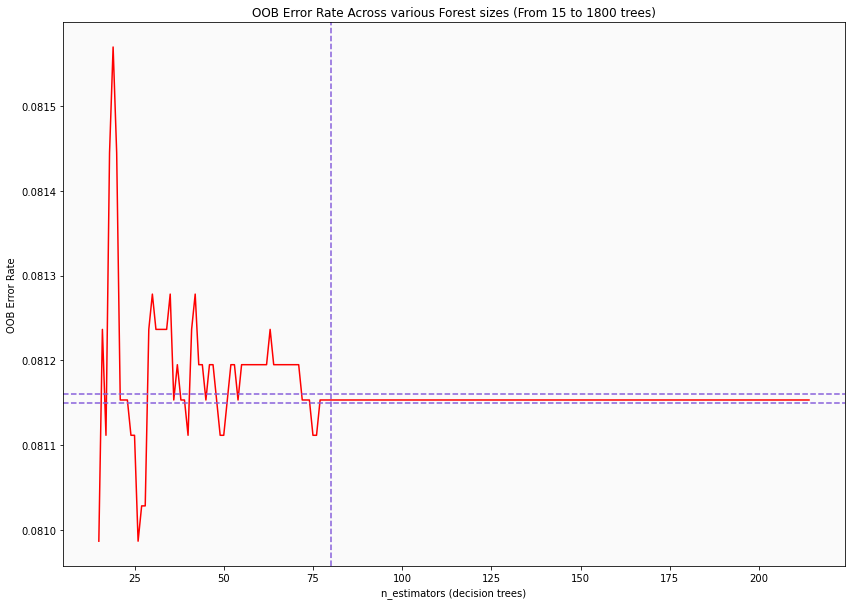

In [143]:
#plotting obb vs number of decision trees
fig, ax = plt.subplots(figsize=(14, 10))

ax.set_facecolor('#fafafa')

backup[:200].plot(kind='line',color = 'red')
plt.axhline(0.08115, color='#875FDB',linestyle='--')
plt.axhline(0.08116, color='#875FDB',linestyle='--')
plt.axvline(80, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators (decision trees)')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes (From 15 to 1800 trees)')

In [144]:
print('OOB Error rate for 80 trees is: {0:.5f}'.format(backup[80]))

OOB Error rate for 80 trees is: 0.08115


In [125]:
fit_rf.set_params(n_estimators=80,
                  bootstrap = True,
                  oob_score=False)

RandomForestClassifier(max_depth=4, max_features=None, n_estimators=80,
                       random_state=0)

In [127]:
fit_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features=None, n_estimators=80,
                       random_state=0)

In [128]:
#predicting the output
predictions_rf = fit_rf.predict(X_test)

In [129]:
print(metrics.classification_report(y_test,predictions_rf))
print('Accuracy: ', metrics.accuracy_score(y_test,predictions_rf))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      9461
           1       0.00      0.00      0.00       827

    accuracy                           0.92     10288
   macro avg       0.46      0.50      0.48     10288
weighted avg       0.85      0.92      0.88     10288

Accuracy:  0.9196150855365475
